<a href="https://colab.research.google.com/github/Loop3D/2022_iamg_workshop/blob/main/m2l_wa_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing dependencies
This workshop will use three libraries from the Loop project
1. LoopStructural - https://github.com/Loop3D/LoopStructural
2. map2loop - https://github.com/Loop3D/map2loop-2
3. tomofast-x - https://github.com/TOMOFAST/Tomofast-x

The following code blocks will install the required dependencies for the Loop libraries into this colab environment. Alternatively, the workshop can be run using the docker image.

In [ ]:
!git clone https://github.com/TOMOFAST/Tomofast-x.git

In [ ]:
%cd Tomofast-x
!make

In [ ]:
%cd tomofast-X
!./tomofastx -j ./parfiles/Parfile_mansf_slice.txt

In [ ]:
%cd ..

## map2loop + LoopStructural

In [1]:
!pip install rasterio
!pip install git+https://github.com/geopandas/geopandas.git@v0.10.2#!pip install .
!pip install hjson
!pip install owslib
!pip install git+https://github.com/Loop3D/map2model_cpp.git
!pip install git+https://github.com/Loop3D/LoopProjectFile.git
!pip install pygeos
!pip install mplstereonet
!pip install lavavu-osmesa
!pip install git+https://github.com/Loop3d/LoopStructural

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
bbox_3d = {'minx': 509727.48772433,
     'miny': 7491991.14850445,
     'maxx': 522116.39294858,
     'maxy': 7500358.30361626,
     'base': -4800,
     'top': 1200}

In [4]:
import os
import hjson
from map2loop.m2l_enums import VerboseLevel
from map2loop.project import Project
proj = Project( 
                 loopdata_state = "WA",
            project_path='./newnew',
    project_crs='EPSG:28350',
    verbose_level=VerboseLevel.NONE,
    working_projection='EPSG:28350',
                )

proj.update_config(
                    out_dir='./newnew',
                    bbox_3d=bbox_3d,
                    project_crs='EPSG:28350',
                    # overwrite='true',
                    # run_flags={'fault_dip':-999},
                    # quiet='None',
    
#                     loopFilename='test.loop3d'
                  )


Directory "./newnew" exists, overwrite? (y/[n])y


The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.


Warnings:
   -> 17 NaN/blank found in column "supersuite" of geology file, replacing with 0


The warnings listed above were issued checking the GEOLOGY map



Warnings:
   -> No fault dip estimate text for fault polylines
   -> 9 NaN/blank found in column "dip_dir" of fault file, replacing with -999
   -> 9 NaN/blank found in column "dip_est" of fault file, replacing with -999


The warnings listed above were issued checking the FAULT map


In [7]:
proj.run()

 70%|███████   | 70/100 [00:16<00:10,  2.81it/s]Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.


This Loop Project File is NOT valid


100%|██████████| 100/100 [00:20<00:00,  4.78it/s]


In [9]:
minx,miny,maxx,maxy = proj.config.bbox
model_base = proj.config.bbox_3d['base']
model_top = proj.config.bbox_3d['top']

In [10]:
f=open(proj.config.tmp_path+'/bbox.csv','w')
f.write('minx,miny,maxx,maxy,lower,upper\n')
ostr='{},{},{},{},{},{}\n'.format(minx,miny,maxx,maxy,model_base,model_top)
f.write(ostr)
f.close()

In [12]:
from LoopStructural import GeologicalModel
fault_params = {'interpolatortype':'FDI',
                'nelements':1e4,
                'step':10,
                'fault_buffer':0.2,
#                 'force_mesh_geometry':True,
#                 'solver':'pyamg',
#                 overprints:overprints,
#                 'cpw':1,
#                 'gpw':5,
               }
foliation_params = {'interpolatortype':'FDI' , # 'interpolatortype':'PLI',
                    'nelements':5e4,  # how many tetras/voxels
                    'buffer':2.,  # how much to extend nterpolation around box
#                     'solver':'pyamg',
#                     'damp':True
                    # 'npw':0,
                    # 'regularisation':0.5
                   }


model, m2l_data = GeologicalModel.from_map2loop_directory(proj.config.project_path,
                                                              evaluate=False,
                                                          fault_params=fault_params,
                                                          rescale=False,
#                                                           vectorscale=1,
                                                          foliation_params=foliation_params)

In [13]:
model.update()

  0%|          | 0/25 [00:00<?, ?it/s]

In [15]:
from LoopStructural.visualisation import LavaVuModelViewer

In [16]:
view = LavaVuModelViewer(model)
view.add_model_surfaces()
view.interactive()

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]


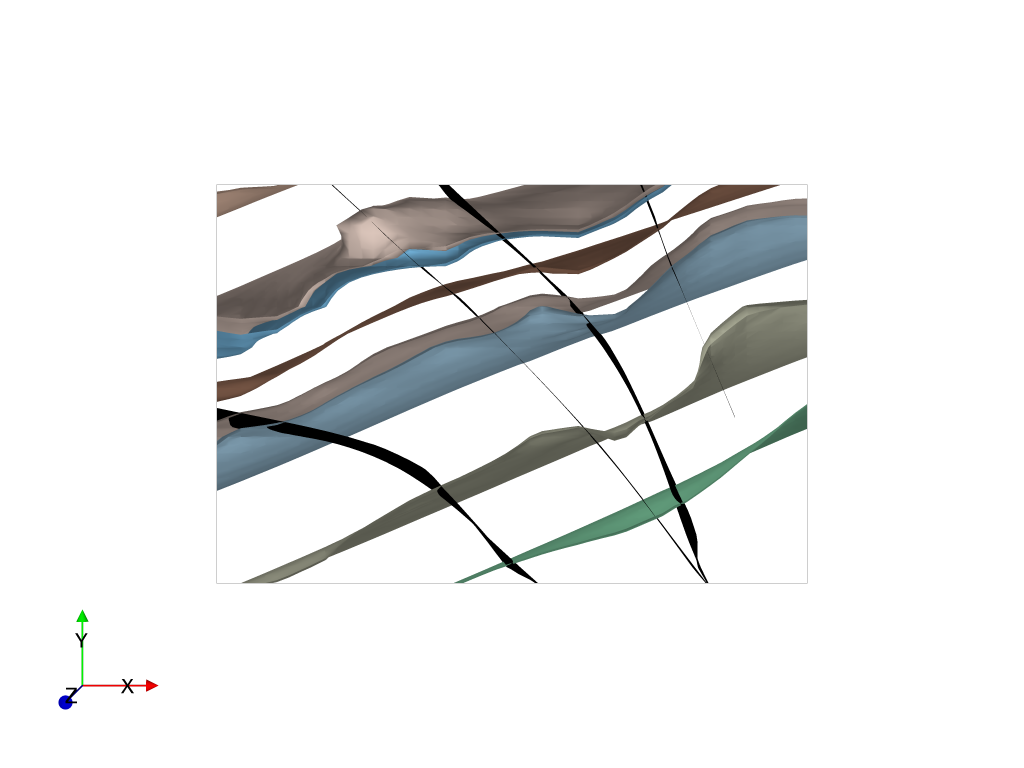

In [17]:
view.display()